In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Loading the data

hr_train = pd.read_csv(r"C:\Python\train_hr.csv",header = 0,index_col = 0)
hr_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
hr_train.shape

(54808, 13)

In [4]:
# Dropping the gender variable as the promotion given will on be performance and not on gender basis
hr_train.drop('gender',axis=1,inplace=True)
hr_train.shape

(54808, 12)

In [5]:
# copy of dataframe hr_train

hr_train1 = hr_train.copy()

In [6]:
# checking the null values

hr_train1.isnull().sum()

department                 0
region                     0
education               2409
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
# filling the missing value with mode as education is a categorical variable

hr_train1["education"].fillna(hr_train1["education"].mode()[0],inplace=True)

# filling the missing the value with zero as it is a numeric variable
hr_train1["previous_year_rating"].fillna(0,inplace=True)

In [8]:
hr_train1.isnull().sum()

department              0
region                  0
education               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
colname = ['department',
'region', 'education',
'recruitment_channel']
colname

['department', 'region', 'education', 'recruitment_channel']

In [10]:
# For preprocessing the data using label Encoder to convert categorical varibale to numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in colname:
        hr_train1[x]=le.fit_transform(hr_train1[x])

In [11]:
hr_train1.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,7,31,2,2,1,35,5.0,8,1,0,49,0
65141,4,14,0,0,1,30,5.0,4,0,0,60,0
7513,7,10,0,2,1,34,3.0,7,0,0,50,0
2542,7,15,0,0,2,39,1.0,10,0,0,50,0
48945,8,18,0,0,1,45,3.0,2,0,0,73,0


In [12]:
# Splitting the data into X & Y

X = hr_train1.values[:,:-1]
Y = hr_train1.values[:,-1]

In [13]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[ 0.80893285  1.77652645  1.61975831 ...  1.35687789 -0.15401776
  -1.07593145]
 [-0.38818322 -0.16303375 -0.62883817 ... -0.73698599 -0.15401776
  -0.25328242]
 [ 0.80893285 -0.61940086 -0.62883817 ... -0.73698599 -0.15401776
  -1.00114517]
 ...
 [-1.98433798 -1.76031862 -0.62883817 ...  1.35687789 -0.15401776
   1.1676568 ]
 [ 0.80893285  2.00471    -0.62883817 ... -0.73698599 -0.15401776
  -1.37507655]
 [-1.1862606  -0.16303375 -0.62883817 ... -0.73698599 -0.15401776
  -1.07593145]]


In [14]:
# Checking the datatypes of variables

hr_train1.dtypes

department                int32
region                    int32
education                 int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [15]:
# Splitting the data into Training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [16]:
import warnings
warnings.filterwarnings("ignore")

## Creating a Function to Evaluate the Models

In [17]:
from sklearn.metrics \
import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_curve, auc
def metric(actual_values, predicted_values):
    l= []
    
    # Confusion matrix 
    cfm = confusion_matrix(actual_values,predicted_values)
    print(cfm)
    
    # Classification Report
    print('\nClassification Report\n',classification_report(actual_values,predicted_values))
    
    
    # Accuracy Score
    acc = round(accuracy_score(actual_values,predicted_values),4)
    l.append(acc)
    print('\nAccuracy of Model :',acc)
          
    
    # Precision value of class 1
    pr_val = round(precision_score(actual_values,predicted_values),4)
    l.append(pr_val)
          
      
    # Recall value of class 1
    rc_vl = round(recall_score(actual_values,predicted_values),4)
    l.append(rc_vl)      
   
          
    # F1 score of class 1
    f1_sc = round(f1_score(actual_values,predicted_values),4)
    l.append(f1_sc)  
          
    
    # Value of Type 1 Error      
    l.append(cfm[0,1])      
          
          
    # Value of Type II Error      
    l.append(cfm[1,0])
          
          
    # Total Error value     
    l.append(cfm[0,1] + cfm[1,0])  
             
   
    return l       
   

In [18]:
result = pd.DataFrame(columns = ['Algorithm','Overall Accuracy','Precision Value','Recall Value','F1-Score',
                                 'Type I Error','Type II Error', 'Total Error'])

result['Algorithm'] = ['Logistic Regression','KNN','SVM', 'Decision Tree', 'Random Forest']

result.set_index('Algorithm', inplace = True)


result_bal = result.copy()

result.head(5)

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error
Algorithm,,,,,,,
Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

def logistic(X_tr, Y_tr, X_te):
    classifier.fit(X_tr, Y_tr)
    return(classifier.predict(X_te))

In [20]:
Y_pred_log = logistic(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_log)

j = 0
for i in result.columns:
    result.loc['Logistic Regression',i] = l[j]
    j += 1

[[14994    70]
 [ 1285    94]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15064
         1.0       0.57      0.07      0.12      1379

    accuracy                           0.92     16443
   macro avg       0.75      0.53      0.54     16443
weighted avg       0.89      0.92      0.89     16443


Accuracy of Model : 0.9176


In [21]:
#result.head()

# KNN

In [22]:
"""
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

for K in range(1,31):
model_KNN = KNeighborsClassifier(K,metric="euclidean")
model_KNN.fit(X_train, Y_train)
Y_pred = model_KNN.predict(X_test)
print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
"""

'\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.neighbors import KNeighborsClassifier\n\nfor K in range(1,31):\nmodel_KNN = KNeighborsClassifier(K,metric="euclidean")\nmodel_KNN.fit(X_train, Y_train)\nY_pred = model_KNN.predict(X_test)\nprint ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)\n'

In [23]:
#predicting using the KNeighbors_Classifier

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 19, metric = 'euclidean')

def KNN(X_tr, Y_tr, X_te):
#fit the model on the data and predict the values
    model_KNN.fit(X_tr, Y_tr)
    return(model_KNN.predict(X_te))

In [24]:
Y_pred_KNN = KNN(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_KNN)

j = 0
for i in result.columns:
    result.loc['KNN',i] = l[j]
    j += 1


[[15029    35]
 [ 1255   124]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15064
         1.0       0.78      0.09      0.16      1379

    accuracy                           0.92     16443
   macro avg       0.85      0.54      0.56     16443
weighted avg       0.91      0.92      0.89     16443


Accuracy of Model : 0.9215


# Support Vecctor Machine(SVM)

In [25]:
from sklearn import svm
svc_model = svm.SVC(kernel = 'rbf', C = 1.0, gamma = 0.1)

def svm_mod(X_tr, Y_tr, X_te): 
    svc_model.fit(X_tr, Y_tr)
    return(svc_model.predict(X_te))

In [26]:
Y_pred_svm = svm_mod(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_svm)

j = 0
for i in result.columns:
    result.loc['SVM',i] = l[j]
    j += 1

[[15044    20]
 [ 1240   139]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     15064
         1.0       0.87      0.10      0.18      1379

    accuracy                           0.92     16443
   macro avg       0.90      0.55      0.57     16443
weighted avg       0.92      0.92      0.89     16443


Accuracy of Model : 0.9234


# Decision Tree

In [27]:
#predicting using the Decision_Tree_Classifier

from sklearn.tree import DecisionTreeClassifier
Dec_tr = DecisionTreeClassifier(random_state=10)

def DecTr(X_tr, Y_tr, X_te):   
#fit the model on the data and predict the values
    Dec_tr.fit(X_tr, Y_tr)
    return(Dec_tr.predict(X_te))

In [28]:
Y_pred_dt = DecTr(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_dt)

j = 0
for i in result.columns:
    result.loc['Decision Tree',i] = l[j]
    j += 1

[[14096   968]
 [  763   616]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     15064
         1.0       0.39      0.45      0.42      1379

    accuracy                           0.89     16443
   macro avg       0.67      0.69      0.68     16443
weighted avg       0.90      0.89      0.90     16443


Accuracy of Model : 0.8947


# Random Forest

In [29]:
#predicting using the Random_Forest_Classifier

from sklearn.ensemble import RandomForestClassifier
random_for = RandomForestClassifier(100,random_state=10)

def Random(X_tr, Y_tr, X_te):
    #fit the model on the data and predict the values
    random_for.fit(X_tr, Y_tr)
    return(random_for.predict(X_te))

In [30]:
Y_pred_rf = Random(X_train, Y_train, X_test)
l = metric(Y_test, Y_pred_rf)

j = 0
for i in result.columns:
    result.loc['Random Forest',i] = l[j]
    j += 1

[[14958   106]
 [  962   417]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     15064
         1.0       0.80      0.30      0.44      1379

    accuracy                           0.94     16443
   macro avg       0.87      0.65      0.70     16443
weighted avg       0.93      0.94      0.92     16443


Accuracy of Model : 0.935


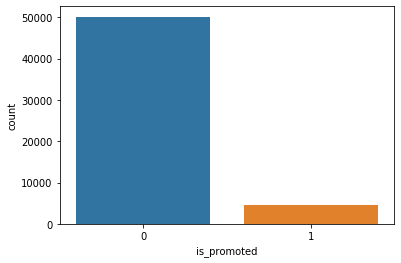

In [32]:
sns.countplot(x = 'is_promoted', data = hr_train1)

## Model Evaluation on Unbalanced Data

In [33]:
result.head()

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error
Algorithm,,,,,,,
Logistic Regression,0.9176,0.5732,0.0682,0.1218,70,1285,1355
KNN,0.9215,0.7799,0.0899,0.1612,35,1255,1290
SVM,0.9234,0.8742,0.1008,0.1808,20,1240,1260
Decision Tree,0.8947,0.3889,0.4467,0.4158,968,763,1731
Random Forest,0.935,0.7973,0.3024,0.4385,106,962,1068


# Oversampling\ Upsampling the Data

In [34]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = hr_train1[hr_train1.is_promoted == 0]
df_minority = hr_train1[hr_train1.is_promoted == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
            replace = True, # sample with replacement
            n_samples = 50140, # to match majority class
            random_state = 10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.is_promoted.value_counts()

1    50140
0    50140
Name: is_promoted, dtype: int64

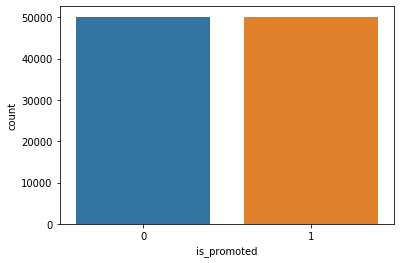

In [36]:
sns.countplot(x = 'is_promoted', data = df_upsampled)

In [37]:
X1 = df_upsampled.values[:,:-1]
Y1 = df_upsampled.values[:,-1]

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X1)

X1 = scaler.transform(X1)
print(X1)

[[ 0.80095407  1.76473212  1.54534627 ...  0.98195379 -0.2672541
  -1.23779348]
 [-0.38713063 -0.1773577  -0.65882154 ... -1.01837786 -0.2672541
  -0.48025744]
 [ 0.80095407 -0.63432001 -0.65882154 ... -1.01837786 -0.2672541
  -1.16892656]
 ...
 [ 1.19698231 -0.06311712  1.54534627 ...  0.98195379 -0.2672541
   0.75934699]
 [ 0.40492584  0.39384519 -0.65882154 ...  0.98195379 -0.2672541
   1.31028229]
 [-1.97124358 -0.1773577  -0.65882154 ... -1.01837786 -0.2672541
   1.3791492 ]]


In [39]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.3,
                                        random_state=10)

## Predictions on Balanced Data

## Logistic Regression

In [40]:
# making prediction on upsampling data using Logistic Regression

Y_pred_log = logistic(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_log)

j = 0
for i in result_bal.columns:
    result_bal.loc['Logistic Regression',i] = l[j]
    j += 1

[[10677  4338]
 [ 3986 11083]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.73      0.71      0.72     15015
         1.0       0.72      0.74      0.73     15069

    accuracy                           0.72     30084
   macro avg       0.72      0.72      0.72     30084
weighted avg       0.72      0.72      0.72     30084


Accuracy of Model : 0.7233


## KNN

In [41]:
# making prediction on upsampling data using KNN

Y_pred_KNN = KNN(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_KNN)

j = 0
for i in result_bal.columns:
    result_bal.loc['KNN',i] = l[j]
    j += 1


[[11072  3943]
 [ 1555 13514]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.88      0.74      0.80     15015
         1.0       0.77      0.90      0.83     15069

    accuracy                           0.82     30084
   macro avg       0.83      0.82      0.82     30084
weighted avg       0.83      0.82      0.82     30084


Accuracy of Model : 0.8172


## SVM

In [42]:
# making prediction on upsampling data using SVM

Y_pred_svm1 = svm_mod(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_svm1)

j = 0
for i in result_bal.columns:
    result_bal.loc['SVM',i] = l[j]
    j += 1

[[10231  4784]
 [ 1576 13493]]

Classification Report
               precision    recall  f1-score   support

         0.0       0.87      0.68      0.76     15015
         1.0       0.74      0.90      0.81     15069

    accuracy                           0.79     30084
   macro avg       0.80      0.79      0.79     30084
weighted avg       0.80      0.79      0.79     30084


Accuracy of Model : 0.7886


## Decision Tree

In [43]:
# making prediction on upsampling data using Decision Tree

Y_pred_dt = DecTr(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_dt)

j = 0
for i in result_bal.columns:
    result_bal.loc['Decision Tree',i] = l[j]
    j += 1

[[13955  1060]
 [    0 15069]]

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     15015
         1.0       0.93      1.00      0.97     15069

    accuracy                           0.96     30084
   macro avg       0.97      0.96      0.96     30084
weighted avg       0.97      0.96      0.96     30084


Accuracy of Model : 0.9648


## Random Forest

In [44]:
# making prediction on upsampling data using Random Forest

Y_pred_rf = Random(X_train1, Y_train1, X_test1)
l = metric(Y_test1, Y_pred_rf)

j = 0
for i in result_bal.columns:
    result_bal.loc['Random Forest',i] = l[j]
    j += 1

[[14410   605]
 [    0 15069]]

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     15015
         1.0       0.96      1.00      0.98     15069

    accuracy                           0.98     30084
   macro avg       0.98      0.98      0.98     30084
weighted avg       0.98      0.98      0.98     30084


Accuracy of Model : 0.9799


## Model Evaluation on Unbalanced Data

In [45]:
result.head()

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error
Algorithm,,,,,,,
Logistic Regression,0.9176,0.5732,0.0682,0.1218,70,1285,1355
KNN,0.9215,0.7799,0.0899,0.1612,35,1255,1290
SVM,0.9234,0.8742,0.1008,0.1808,20,1240,1260
Decision Tree,0.8947,0.3889,0.4467,0.4158,968,763,1731
Random Forest,0.935,0.7973,0.3024,0.4385,106,962,1068


## Model Evaluation on Balanced Data

In [46]:
result_bal.head()

,Overall Accuracy,Precision Value,Recall Value,F1-Score,Type I Error,Type II Error,Total Error
Algorithm,,,,,,,
Logistic Regression,0.7233,0.7187,0.7355,0.727,4338,3986,8324
KNN,0.8172,0.7741,0.8968,0.831,3943,1555,5498
SVM,0.7886,0.7383,0.8954,0.8093,4784,1576,6360
Decision Tree,0.9648,0.9343,1,0.966,1060,0,1060
Random Forest,0.9799,0.9614,1,0.9803,605,0,605


# Actual Test data

### Performing EDA Tools on Test data

In [47]:
hr_test = pd.read_csv('test_hr.csv',index_col = 0,header = 0)
hr_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [48]:
hr_test1 = hr_test.copy()

In [49]:
hr_test1.drop('gender',axis =1,inplace = True)

In [50]:
hr_test1.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,sourcing,1,30,4.0,7,0,0,61


In [51]:
hr_test1.isnull().sum()

department                 0
region                     0
education               1034
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [52]:
hr_test1['education'].mode()[0]

"Bachelor's"

In [53]:
hr_test1['education'].fillna(hr_test1['education'].mode()[0],inplace = True)
hr_test1['previous_year_rating'].fillna(0,inplace = True)

In [54]:
hr_test1.isnull().sum()

department              0
region                  0
education               0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [55]:
for x in colname:
        hr_test1[x]=le.fit_transform(hr_test1[x])

In [56]:
hr_test1.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,
8724,8,18,0,2,1,24,0.0,1,1,0,77
74430,2,28,0,0,1,31,3.0,5,0,0,51
72255,7,4,0,0,1,31,1.0,4,0,0,47
38562,5,11,0,0,3,31,2.0,9,0,0,65
64486,1,21,0,2,1,30,4.0,7,0,0,61


In [57]:
X2 = hr_test1.values[:,:]

In [58]:
len(X)

54808

In [59]:
hr_test1.dtypes

department                int32
region                    int32
education                 int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [60]:
X3 = scaler.transform(X2)
print(X3)

[[ 1.19698231  0.27960461 -0.65882154 ...  0.98195379 -0.2672541
   0.69048007]
 [-1.1791871   1.42201038 -0.65882154 ... -1.01837786 -0.2672541
  -1.10005965]
 [ 0.80095407 -1.31976347 -0.65882154 ... -1.01837786 -0.2672541
  -1.3755273 ]
 ...
 [-1.1791871  -0.97704174 -0.65882154 ... -1.01837786 -0.2672541
  -1.16892656]
 [ 0.0088976   0.96504807 -0.65882154 ... -1.01837786 -0.2672541
   0.20841169]
 [ 1.19698231 -0.86280116  1.54534627 ...  0.98195379 -0.2672541
   1.51688303]]


In [61]:
Y_pred_rft = random_for.predict(X3)

In [62]:
hr_test1['Promoted'] = Y_pred_rft.astype(int)

In [63]:
hr_test1.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Promoted
employee_id,,,,,,,,,,,,
8724,8,18,0,2,1,24,0.0,1,1,0,77,0
74430,2,28,0,0,1,31,3.0,5,0,0,51,0
72255,7,4,0,0,1,31,1.0,4,0,0,47,0
38562,5,11,0,0,3,31,2.0,9,0,0,65,0
64486,1,21,0,2,1,30,4.0,7,0,0,61,0


In [64]:
hr_test1['Promoted']= hr_test1['Promoted'].map({1: 'Yes', 0: 'No'})     
hr_test1.to_csv('Final Prediction.csv')

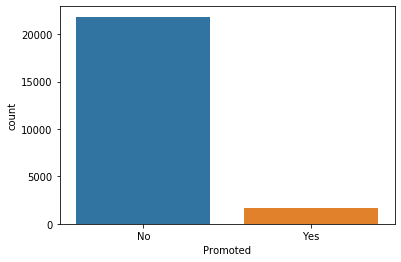

In [66]:
sns.countplot(x = "Promoted", data = hr_test1)

In [67]:
hr_test1['Promoted'].value_counts()

No     21849
Yes     1641
Name: Promoted, dtype: int64

# ANN - MLP Classifier

In [69]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (100),
                    max_iter = 100,
                    early_stopping = True,
                    random_state = 10,
                    activation = "relu",
                    solver = "adam",
                    learning_rate = "constant",
                    learning_rate_init = 0.01, 
                    verbose = True,
                    n_iter_no_change = 5)

mlp.fit(X_train1, Y_train1)
Y_pred = mlp.predict(X_test1)

Iteration 1, loss = 0.49353556
Validation score: 0.759687
Iteration 2, loss = 0.44496514
Validation score: 0.787892
Iteration 3, loss = 0.41774846
Validation score: 0.799288
Iteration 4, loss = 0.39958101
Validation score: 0.796724
Iteration 5, loss = 0.38543961
Validation score: 0.811538
Iteration 6, loss = 0.37606174
Validation score: 0.818091
Iteration 7, loss = 0.36970200
Validation score: 0.811254
Iteration 8, loss = 0.36471271
Validation score: 0.817664
Iteration 9, loss = 0.36296416
Validation score: 0.803561
Iteration 10, loss = 0.36004489
Validation score: 0.813960
Iteration 11, loss = 0.35759419
Validation score: 0.813675
Iteration 12, loss = 0.35636087
Validation score: 0.818234
Iteration 13, loss = 0.35492332
Validation score: 0.820228
Iteration 14, loss = 0.35287140
Validation score: 0.820228
Iteration 15, loss = 0.35227568
Validation score: 0.822222
Iteration 16, loss = 0.35042860
Validation score: 0.818661
Iteration 17, loss = 0.34996458
Validation score: 0.811681
Iterat

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test1,Y_pred)
print(cfm)

print("Classification_report :")
print(classification_report(Y_test1,Y_pred))

acc=accuracy_score(Y_test1,Y_pred)
print("accuracy_score :",acc)

[[10788  4227]
 [  910 14159]]
Classification_report :
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81     15015
         1.0       0.77      0.94      0.85     15069

    accuracy                           0.83     30084
   macro avg       0.85      0.83      0.83     30084
weighted avg       0.85      0.83      0.83     30084

accuracy_score : 0.8292447812790852


# GRID SEARCH CV

In [72]:
mlp_gs = MLPClassifier(max_iter=100,early_stopping=True,n_iter_no_change=5,
random_state=10,learning_rate_init=0.01,
verbose=True )
parameter_space = {
'hidden_layer_sizes': [(12,12,12),(10,10)],
'activation': ['tanh', 'relu'],
'solver': ['sgd', 'adam'],
'alpha': [0.0001, 0.01],
'learning_rate': ['constant']
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

In [73]:
clf.fit(X_train1,Y_train1)

Iteration 1, loss = 0.50036045
Validation score: 0.774644
Iteration 2, loss = 0.41293006
Validation score: 0.810969
Iteration 3, loss = 0.38576882
Validation score: 0.812821
Iteration 4, loss = 0.37153351
Validation score: 0.814957
Iteration 5, loss = 0.36771607
Validation score: 0.816097
Iteration 6, loss = 0.36586634
Validation score: 0.820655
Iteration 7, loss = 0.36278737
Validation score: 0.821510
Iteration 8, loss = 0.36018440
Validation score: 0.817949
Iteration 9, loss = 0.35898431
Validation score: 0.819801
Iteration 10, loss = 0.35834264
Validation score: 0.821083
Iteration 11, loss = 0.35790253
Validation score: 0.819516
Iteration 12, loss = 0.35586844
Validation score: 0.822365
Iteration 13, loss = 0.35558282
Validation score: 0.819231
Iteration 14, loss = 0.35517769
Validation score: 0.822080
Iteration 15, loss = 0.35401783
Validation score: 0.823362
Iteration 16, loss = 0.35392931
Validation score: 0.823077
Iteration 17, loss = 0.35348483
Validation score: 0.819801
Iterat

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True,
                                     learning_rate_init=0.01, max_iter=100,
                                     n_iter_no_change=5, random_state=10,
                                     verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(12, 12, 12), (10, 10)],
                         'learning_rate': ['constant'],
                         'solver': ['sgd', 'adam']})

In [74]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'solver': 'adam'}


In [78]:
Y_pred_cv = clf.predict(X_test1)
#print(list(zip(Y_test,Y_pred)))

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test1,Y_pred_cv)
print(cfm)

print("Classification_report :")
print(classification_report(Y_test1,Y_pred_cv))

acc=accuracy_score(Y_test1,Y_pred_cv)
print("accuracy_score :",acc)

[[10411  4604]
 [  734 14335]]
Classification_report :
              precision    recall  f1-score   support

         0.0       0.93      0.69      0.80     15015
         1.0       0.76      0.95      0.84     15069

    accuracy                           0.82     30084
   macro avg       0.85      0.82      0.82     30084
weighted avg       0.85      0.82      0.82     30084

accuracy_score : 0.822563488897753
